<a href="https://colab.research.google.com/github/rahmanziaur/DTClassifierTest/blob/main/RF_HealthDM_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest on Medical Dataset**

****Importing libraries****

In [2]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always') 

**Upload File**

In [ ]:
#uploaded = files.upload()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the Dataset**

In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/ColabDatasets/preprocessed medical data 2 - Copy.csv')

**Exploratory Data Analysis**

In [5]:
dataset.head()

,mrn,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,diabetesMed,label
0,779,1.0,1,1,1,1,7,1,5,36.00,...,0,0,0,0,0,0,0,0,0,1
1,601,1.0,1,1,1,1,7,2,5,38.79,...,0,0,0,0,0,0,0,0,0,1
2,237,1.0,2,1,1,1,7,1,5,38.00,...,0,0,0,0,0,0,0,2,1,1
3,589,1.0,2,1,1,1,7,2,5,36.00,...,0,0,0,0,0,0,0,2,1,1
4,436,1.0,2,1,6,25,7,2,5,47.00,...,0,0,0,0,0,0,0,2,1,1


In [6]:
print(dataset.shape)

(101763, 37)


In [7]:
print(list(dataset.columns))

['mrn', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'diabetesMed', 'label']


In [8]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [9]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['mrn',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'diabetesMed']

**Split Dataset**

In [10]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [11]:
X.head()

,mrn,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,diabetesMed
0,779,1.0,1,1,1,1,7,1,5,36.00,...,0,0,0,0,0,0,0,0,0,0
1,601,1.0,1,1,1,1,7,2,5,38.79,...,0,0,0,0,0,0,0,0,0,0
2,237,1.0,2,1,1,1,7,1,5,38.00,...,0,0,0,0,0,0,0,0,2,1
3,589,1.0,2,1,1,1,7,2,5,36.00,...,0,0,0,0,0,0,0,0,2,1
4,436,1.0,2,1,6,25,7,2,5,47.00,...,0,0,0,0,0,0,0,0,2,1


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

**Splitting Data**

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (71234, 36)
X_test shape  is :  (30529, 36)
y_train shape is :  (71234,)
y_test shape is  :  (30529,)


**Building Decision Tree Model**

In [15]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [16]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [17]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[    3   144     0     0  3924]
 [    7   252     0     0  7542]
 [    4    81     0     0  2333]
 [    2    30     0     0   806]
 [   21   532     3     0 14845]]
              precision    recall  f1-score   support

           1       0.08      0.00      0.00      4071
           2       0.24      0.03      0.06      7801
           4       0.00      0.00      0.00      2418
           8       0.00      0.00      0.00       838
          16       0.50      0.96      0.66     15401

    accuracy                           0.49     30529
   macro avg       0.17      0.20      0.14     30529
weighted avg       0.33      0.49      0.35     30529



In [20]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

# Model Precision: what percentage of positive tuples are labeled as such?
#print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
#print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
#print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
#print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 49.461168069704215 %
Mean Absolute Error: 6.7873169773002715
Cohens kappa: -0.0017751485418553425
Train Time(s):  15.023755729000072
Test Time(s):  1.1500512920000574


In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ValueError: ignored

In [22]:
plot_roc_curve(fpr, tpr)

NameError: ignored

In [23]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-RF_Result.csv')

**Finding Important Features in Scikit-learn**

In [24]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

mrn                         1.271523e-01
num_lab_procedures          1.094149e-01
num_medications             9.709655e-02
time_in_hospital            6.803849e-02
age                         5.975308e-02
medical_specialty           4.945552e-02
num_procedures              4.755021e-02
number_diagnoses            4.735287e-02
discharge_disposition_id    4.100139e-02
payer_code                  3.752785e-02
number_inpatient            3.573956e-02
insulin                     3.479739e-02
race                        2.355746e-02
number_outpatient           2.335176e-02
gender                      2.308164e-02
admission_type_id           2.155518e-02
admission_source_id         2.090144e-02
A1Cresult                   2.003190e-02
metformin                   1.868166e-02
number_emergency            1.585821e-02
glipizide                   1.430211e-02
diabetesMed                 1.318276e-02
glyburide                   1.255329e-02
pioglitazone                9.957903e-03
rosiglitazone   

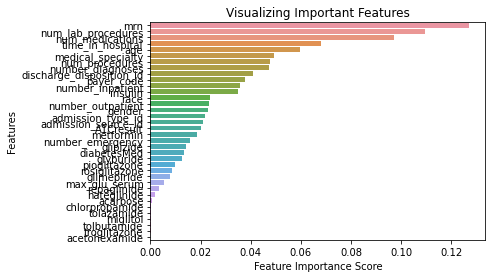

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**Generating the Model on Selected Features**

In [27]:
# Split dataset into features and labels
X = dataset.drop(['label','mrn','num_lab_procedures', 'miglitol', 'tolazamide', 'nateglinide', 'diabetesMed', 'glyburide', 'glipizide', 'number_emergency'], axis=1) # New Features
y=dataset['label']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [28]:
print(X.shape)

(101763, 27)


In [30]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [31]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [34]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   74   656    25     6  8793]
 [  142  1248    38     5 16938]
 [   42   375     8     3  5147]
 [   18   151     8     1  1769]
 [  241  2545    62    25 32915]]
              precision    recall  f1-score   support

           1       0.14      0.01      0.01      9554
           2       0.25      0.07      0.11     18371
           4       0.06      0.00      0.00      5575
           8       0.03      0.00      0.00      1947
          16       0.50      0.92      0.65     35788

    accuracy                           0.48     71235
   macro avg       0.20      0.20      0.15     71235
weighted avg       0.34      0.48      0.36     71235



In [38]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.48074682389274936


ValueError: ignored

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48074682389274936


In [49]:
#@title One-Hot Encoding



In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# evaluate logistic regression on the breast cancer dataset with an one-hot encoding
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# define the location of the dataset

In [61]:
dataset=pd.read_csv('/content/drive/MyDrive/ColabDatasets/preprocessed medical data 2 - Copy.csv')

In [62]:
dataset = dataset.replace('?', 'nan')

In [63]:
dataset.to_csv('/content/drive/MyDrive/ColabDatasets/preprocessed medical data 2 - Copy.csv')

In [64]:
#from numpy import argmax as ag

url = "/content/drive/MyDrive/ColabDatasets/preprocessed medical data 2 - Copy.csv"
# load the dataset
dataset = pd.read_csv(url, header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
label_encoder.fit(y_test)
y_test = label_encoder.transform(y_test)

X_train.to_csv('/content/drive/MyDrive/ColabDatasets/preprocessed medical data 2 - Copy.csv')

# define the model
clf = RandomForestClassifier()
# fit on the training set
clf.fit(X_train, y_train)
# predict on test set
yhat = clf.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

AttributeError: ignored

In [53]:
target_cols=list(dataset.columns[-1:])
target_cols

[37]

In [54]:
target_cols=list(dataset.columns[-1:])
target_cols
feature_cols= list(dataset.columns[:-1])
feature_cols

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

In [55]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

ValueError: ignored

In [56]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [65]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
url = "/content/drive/MyDrive/ColabDatasets/preprocessed medical data 2 - Copy.csv"
# load the dataset
dataset = pd.read_csv(url, header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
label_encoder.fit(y_test)
y_test = label_encoder.transform(y_test)



# # load the dataset
# dataset = loadtxt('/content/drive/MyDrive/Colab Notebooks/Zia Sir/final Medical2.csv', delimiter=',')
# # split into input (X) and output (y) variables
# X = dataset[:,0:36]
# y = dataset[:,36]
# # define the keras model
model = Sequential()
model.add(Dense(128, input_shape=(35,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150


ValueError: ignored

In [ ]:
X_train[0]

<1x1465 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>